## 데이터 로드

In [1]:
import json
import pandas as pd

with open('../Datasets/train.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [2]:
train_data = pd.DataFrame(json_data)
train_data = train_data.drop(['id', 'plylst_title', 'updt_date'], axis=1)
train_data.head()

,tags,songs,like_cnt
0,[락],"[525514, 129701, 383374, 562083, 297861, 13954...",71
1,"[추억, 회상]","[432406, 675945, 497066, 120377, 389529, 24427...",1
2,"[까페, 잔잔한]","[83116, 276692, 166267, 186301, 354465, 256598...",17
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...","[394031, 195524, 540149, 287984, 440773, 10033...",33
4,[댄스],"[159327, 553610, 5130, 645103, 294435, 100657,...",9


In [3]:
with open('../Datasets/song_meta_with_likes.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [4]:
song_data = pd.DataFrame(json_data)
song_data = song_data.drop(['album_name', 'song_gn_gnr_basket'], axis=1)
song_data.head()

,song_gn_dtl_gnr_basket,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,id,like_cnt_song
0,[GN0901],20140512,2255639,[2727],Feelings,[Various Artists],0,0.616807
1,"[GN1601, GN1606]",20080421,376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1,0.000000
2,[GN0901],20180518,4698747,[3361],Solsbury Hill (Remastered 2002),[Peter Gabriel],2,0.000000
3,"[GN1102, GN1101]",20151016,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3,22.996574
4,"[GN1802, GN1801]",20110824,2008470,[560160],그남자 그여자,[Jude Law],4,0.297234


## 데이터 열 이름 변경

In [5]:
train_data.rename(columns={'songs':'song_id'}, inplace=True)
train_data.head()

,tags,song_id,like_cnt
0,[락],"[525514, 129701, 383374, 562083, 297861, 13954...",71
1,"[추억, 회상]","[432406, 675945, 497066, 120377, 389529, 24427...",1
2,"[까페, 잔잔한]","[83116, 276692, 166267, 186301, 354465, 256598...",17
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...","[394031, 195524, 540149, 287984, 440773, 10033...",33
4,[댄스],"[159327, 553610, 5130, 645103, 294435, 100657,...",9


## 데이터 추출

- 500개의 플레이리스트 추출

In [6]:
train_data_sample = train_data[500:1000].copy()
train_data_sample = train_data_sample.reset_index(drop=True)
#train_data_sample = train_data

In [7]:
song_data.rename(columns={'id':'song_id', 'song_gn_dtl_gnr_basket': 'gnr'}, inplace=True)
song_data = song_data.astype({'issue_date':'int64'})
song_data.head()

,gnr,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,song_id,like_cnt_song
0,[GN0901],20140512,2255639,[2727],Feelings,[Various Artists],0,0.616807
1,"[GN1601, GN1606]",20080421,376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1,0.000000
2,[GN0901],20180518,4698747,[3361],Solsbury Hill (Remastered 2002),[Peter Gabriel],2,0.000000
3,"[GN1102, GN1101]",20151016,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3,22.996574
4,"[GN1802, GN1801]",20110824,2008470,[560160],그남자 그여자,[Jude Law],4,0.297234


## 노래별 가중치 설정

count    591216.000000
mean         18.528749
std          73.444383
min           0.005000
25%           0.302632
50%           1.509804
75%           8.990398
max        3548.345552
Name: like_cnt_song, dtype: float64

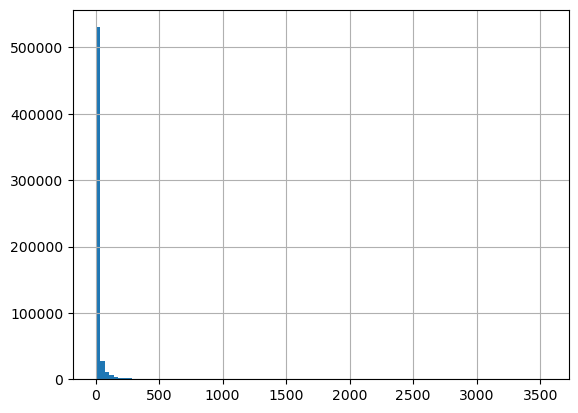

In [8]:
# 좋아요 개수 분포 확인을 위한 코드
clean_song_data = song_data[song_data['like_cnt_song'] > 0]
clean_song_data['like_cnt_song'].hist(bins=100)
clean_song_data['like_cnt_song'].describe()

In [9]:
bins = [-1, 0.001, 0.3, 1.5, 9, 3600]  # 구간 분할
labels = [0, 0.8, 0.85, 0.9, 0.95]  # 구간별 가중치 지정

song_data['weight'] = pd.cut(song_data['like_cnt_song'], bins=bins, labels=labels)  # 구간별 가중치 지정
song_data.head(10)

,gnr,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,song_id,like_cnt_song,weight
0,[GN0901],20140512,2255639,[2727],Feelings,[Various Artists],0,0.616807,0.85
1,"[GN1601, GN1606]",20080421,376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1,0.000000,0.00
2,[GN0901],20180518,4698747,[3361],Solsbury Hill (Remastered 2002),[Peter Gabriel],2,0.000000,0.00
3,"[GN1102, GN1101]",20151016,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3,22.996574,0.95
4,"[GN1802, GN1801]",20110824,2008470,[560160],그남자 그여자,[Jude Law],4,0.297234,0.80
5,[GN1701],20100602,911754,[475840],Para Los Enamorados,"[Bye, Lupita]",5,24.995233,0.95
6,"[GN1601, GN1602, GN1614]",20170208,10038397,"[162097, 100237]",Sibelius : Valse Triste Op.44 (시벨리우스 : 슬픈 왈츠 작...,"[Herbert Blomstedt, San Francisco Symphony]",6,0.857143,0.85
7,"[GN1601, GN1602, GN1614]",20190315,10261160,"[105210, 261542]",Superman March (From &#34;Superman&#34; / Live...,"[Los Angeles Philharmonic Orchestra, Gustavo D...",7,0.115385,0.80
8,[GN0301],20070625,353020,[224583],Lovers’ Leap (Feat. Qypthone),[애플스],8,0.000000,0.00
9,"[GN0105, GN0101]",20170320,10047088,[753752],"사랑, 그대라는 멜로디",[진호],9,7.006667,0.90


# 한국어 -> 영어 변환
- 한국어 전처리에 어려움이 있어서, 영어로 모두 변환 후 처리

In [10]:
'''
from googletrans import Translator
import time

def trans_to_eng(tags):
    time.sleep(1)
    translator = Translator()
    translated = translator.translate(tags, src = 'ko', dest = 'en')
    return translated.text

for i in range(len(train_data_sample)):
    eng_tags = [trans_to_eng(tag) for tag in train_data_sample['tags'][i]]
    train_data_sample['tags'][i] = eng_tags

train_data_sample.to_json('../Datasets/train_eng1.json', orient='records')
train_data_sample.head(30)

    
#train_data.head()
#eng_tags = [trans_to_eng(tag) for tag in train_data['tags'][1]]
#print("Kor: ", train_data['tags'][1])
#print("Eng: ", eng_tags)
'''

'\nfrom googletrans import Translator\nimport time\n\ndef trans_to_eng(tags):\n    time.sleep(1)\n    translator = Translator()\n    translated = translator.translate(tags, src = \'ko\', dest = \'en\')\n    return translated.text\n\nfor i in range(len(train_data_sample)):\n    eng_tags = [trans_to_eng(tag) for tag in train_data_sample[\'tags\'][i]]\n    train_data_sample[\'tags\'][i] = eng_tags\n\ntrain_data_sample.to_json(\'../Datasets/train_eng1.json\', orient=\'records\')\ntrain_data_sample.head(30)\n\n    \n#train_data.head()\n#eng_tags = [trans_to_eng(tag) for tag in train_data[\'tags\'][1]]\n#print("Kor: ", train_data[\'tags\'][1])\n#print("Eng: ", eng_tags)\n'

In [11]:
with open('../Datasets/train_eng1.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [12]:
train_data_eng = pd.DataFrame(json_data)
train_data_eng.head(10)

,tags,song_id,like_cnt
0,"[Billow, EDMFLOOR]","[582347, 577988, 4096, 223252, 108282, 279668,...",0
1,"[Mood, night, dawn]","[275780, 507372, 515378, 69298, 485934, 70353,...",11
2,[dance],"[569611, 526963, 153766, 530329, 259795, 38108...",9
3,"[girl group, Ballade]","[250038, 242240, 566455, 462740, 51643, 148007...",8
4,"[rest, autumn, windless, Smashing, depressed, ...","[582800, 450067, 500795, 204042, 350054, 56196...",7
5,[OST],"[77272, 570436, 519581, 682976, 254934, 413652...",54
6,"[new song, beat, beat]","[138733, 201419, 581276, 299548, 239410, 40614...",4
7,[jazz],"[21633, 334647, 522108, 380071, 221363, 364759...",41
8,"[rest, Monday disease, good song, timbre, heal...","[128740, 649662, 348552, 166841, 24913, 323611...",1
9,[healing],"[270269, 331055, 514773, 300534, 488307, 33533...",2


# 태그 자연어 전처리

### 특수문자 및 공백 제외 + 대->소문자 변환

In [13]:
import re

print(train_data_eng['tags'][3])
pattern = re.compile('[^a-zA-Z0-9]')#특수문자나 공백을 띄어쓰기로 처리할지는 이후 테스트
idx = 0
for tags in train_data_eng['tags']:
    eng_tags = []
    for tag in tags:
        temp_tags = re.sub(pattern, ' ', tag).lower().split()
        for temp_tag in temp_tags:
            eng_tags.append(temp_tag)
    train_data_eng['tags'][idx] = eng_tags
    idx += 1
print(train_data_eng['tags'][3])

['girl group', 'Ballade']
['girl', 'group', 'ballade']


C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\2424180763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_eng['tags'][idx] = eng_tags


### Stopwords 제거

In [14]:
import nltk
from nltk.corpus import stopwords
#nltk.download('popular') # nltk 라이브러리 사용을 위해 다운해야 함

stops = set(stopwords.words('english'))

for i in range(len(train_data_eng)):
    eng_tags = [tag for tag in train_data_eng['tags'][i] if not tag in stops]
    if train_data_eng['tags'][i] != eng_tags:
        print(train_data_eng['tags'][i])
        print(eng_tags)
    train_data_eng['tags'][i] = eng_tags

['work', 'out']
['work']
['cafe', 'rest', 'coffee', 'and', 'drive', 'windless']
['cafe', 'rest', 'coffee', 'drive', 'windless']
['mood', 'work', 'out']
['mood', 'work']
['hip', 'hop', 'label', 'crew', 'lab', 'domestic', 'hip', 'hop', 'trend', 'show', 'me', 'the', 'money', 'swag', 'aomg', 'hilite', '2010']
['hip', 'hop', 'label', 'crew', 'lab', 'domestic', 'hip', 'hop', 'trend', 'show', 'money', 'swag', 'aomg', 'hilite', '2010']
['game', 'nexon', 'need', 'for', 'speed', 'ost', 'needforspeed', 'need', 'force', 'feed', 'edge']
['game', 'nexon', 'need', 'speed', 'ost', 'needforspeed', 'need', 'force', 'feed', 'edge']
['rest', 'performance', 'song', 'piano', 'piano', 'good', 'music', 'to', 'listen', 'to', 'in', 'the', 'cafe', 'americano', 'lyric', 'new', 'age', 'piano', 'performance', 'clearing', 'waking', 'up', 'breakfast']
['rest', 'performance', 'song', 'piano', 'piano', 'good', 'music', 'listen', 'cafe', 'americano', 'lyric', 'new', 'age', 'piano', 'performance', 'clearing', 'waking', '

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1469886280.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_eng['tags'][i] = eng_tags


### Stemming

In [15]:
stemmer = nltk.stem.SnowballStemmer('english')
for i in range(len(train_data_eng)):
    eng_tags = [stemmer.stem(tag) for tag in train_data_eng['tags'][i]]
    train_data_eng['tags'][i] = eng_tags

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\3854077717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_eng['tags'][i] = eng_tags


### 중복 제거

In [16]:
for i in range(len(train_data_eng)):
    eng_tags = list(dict.fromkeys(train_data_eng['tags'][i]))
    train_data_eng['tags'][i] = eng_tags

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1253149308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_eng['tags'][i] = eng_tags


### 한 글자로 된 단어 제거

In [17]:
for i in range(len(train_data_eng)):
    eng_tags = [tag for tag in train_data_eng['tags'][i] if len(tag) > 1]
    train_data_eng['tags'][i] = eng_tags

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\423532492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_eng['tags'][i] = eng_tags


### 추가적인 자연어 처리

In [18]:
# '록' 또는 '락' 이 'lock' 으로 번역되는 문제가 있어서, 'rock' 으로 일괄적으로 수정
pattern = re.compile(r'\block\b')
for i in range(len(train_data_eng)):
    eng_tags = [re.sub(pattern, 'rock', tag) for tag in train_data_eng['tags'][i]]
    train_data_eng['tags'][i] = eng_tags

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\3699684927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_eng['tags'][i] = eng_tags


In [19]:
train_data_sample = train_data_eng.copy()
train_data_sample = train_data_sample.reset_index(drop=True)
train_data_sample.head(20)

,tags,song_id,like_cnt
0,"[billow, edmfloor]","[582347, 577988, 4096, 223252, 108282, 279668,...",0
1,"[mood, night, dawn]","[275780, 507372, 515378, 69298, 485934, 70353,...",11
2,[danc],"[569611, 526963, 153766, 530329, 259795, 38108...",9
3,"[girl, group, ballad]","[250038, 242240, 566455, 462740, 51643, 148007...",8
4,"[rest, autumn, windless, smash, depress, balla...","[582800, 450067, 500795, 204042, 350054, 56196...",7
5,[ost],"[77272, 570436, 519581, 682976, 254934, 413652...",54
6,"[new, song, beat]","[138733, 201419, 581276, 299548, 239410, 40614...",4
7,[jazz],"[21633, 334647, 522108, 380071, 221363, 364759...",41
8,"[rest, monday, diseas, good, song, timbr, heal...","[128740, 649662, 348552, 166841, 24913, 323611...",1
9,[heal],"[270269, 331055, 514773, 300534, 488307, 33533...",2


## 태그 병합

- 같은 노래에 부여된 서로 다른 태그들을 합친다
- 그 결과 동일한 태그 리스트가 거의 모든 노래에 부여되었다

In [20]:
train_data_sample = train_data_sample.explode('song_id', ignore_index=True)
train_data_sample.head(30)

,tags,song_id,like_cnt
0,"[billow, edmfloor]",582347,0
1,"[billow, edmfloor]",577988,0
2,"[billow, edmfloor]",4096,0
3,"[billow, edmfloor]",223252,0
4,"[billow, edmfloor]",108282,0
5,"[billow, edmfloor]",279668,0
6,"[billow, edmfloor]",419946,0
7,"[billow, edmfloor]",430613,0
8,"[billow, edmfloor]",57445,0
9,"[billow, edmfloor]",302788,0


In [21]:
train_dict = dict()

for i in range(len(train_data_sample)):
    song = train_data_sample['song_id'][i]
    tag = train_data_sample['tags'][i]
    
    if song in train_dict:
        for j in tag:
            train_dict[song].add(j)
    
    else:
        train_dict[song] = set(tag)
        
print(train_dict[157435])

{'song', 'hit', 'memori', 'group', 'kpop', 'girl', 'reminisc', 'idol', 'windless', 'danc'}


In [22]:
train_data_sample.drop_duplicates(subset='song_id', keep='first',inplace=True)
train_data_sample.shape

(18275, 3)

In [23]:
for i in range(len(train_data_sample)):
    song = train_data_sample['song_id'].iloc[i]
    
    train_data_sample['tags'].iloc[i] = list(train_dict[song])

train_data_sample.head()

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1966443478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_sample['tags'].iloc[i] = list(train_dict[song])


,tags,song_id,like_cnt
0,"[edmfloor, billow]",582347,0
1,"[edmfloor, billow]",577988,0
2,"[edmfloor, billow]",4096,0
3,"[edmfloor, billow]",223252,0
4,"[edmfloor, club, billow, stress]",108282,0


In [24]:
song_tag_appended = pd.merge(train_data_sample, song_data)
song_tag_appended = song_tag_appended.astype({'song_id':'int64'})
song_tag_appended.head()

,tags,song_id,like_cnt,gnr,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,like_cnt_song,weight
0,"[edmfloor, billow]",582347,0,"[GN1104, GN1103, GN1101]",20171220,10121025,[784873],No Coming Down,[Nghtmre],5.892632,0.90
1,"[edmfloor, billow]",577988,0,"[GN1014, GN1001]",20180605,10135634,[718938],Get Out,[CHVRCHES],178.479183,0.95
2,"[edmfloor, billow]",4096,0,"[GN1014, GN1001]",20180605,10135634,[718938],Miracle,[CHVRCHES],405.500124,0.95
3,"[edmfloor, billow]",223252,0,"[GN2701, GN2702, GN2703, GN1104, GN1103, GN1101]",20180413,10157297,[990703],Batshit,[Sofi Tukker],295.274991,0.95
4,"[edmfloor, club, billow, stress]",108282,0,"[GN2701, GN2702, GN2703, GN1104, GN1103, GN1101]",20180413,10157297,[990703],"Best Friend (Feat. NERVO, The Knocks & Alisa U...",[Sofi Tukker],188.843021,0.95


In [25]:
song_tag_appended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18275 entries, 0 to 18274
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tags                18275 non-null  object  
 1   song_id             18275 non-null  int64   
 2   like_cnt            18275 non-null  int64   
 3   gnr                 18275 non-null  object  
 4   issue_date          18275 non-null  int64   
 5   album_id            18275 non-null  int64   
 6   artist_id_basket    18275 non-null  object  
 7   song_name           18275 non-null  object  
 8   artist_name_basket  18275 non-null  object  
 9   like_cnt_song       18275 non-null  float64 
 10  weight              18275 non-null  category
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 1.6+ MB


## Word2Vec 사용

- 태그 리스트들을 word2vec로 학습시켜 태그 하나와 연관된 다른 태그들을 유추

In [26]:
#train_data_sample2 = train_data[500:1000].copy()
train_data_sample2 = train_data_eng.copy()
train_data_sample2 = train_data_sample2.reset_index(drop=True)
#train_data_sample2 = train_data

In [27]:
from gensim.models.word2vec import Word2Vec

w2v = Word2Vec(sentences = song_tag_appended['tags'], vector_size = 100, 
               window = 5, min_count = 15, workers = 4, sg = 1)

w2v.wv.vectors.shape

(510, 100)

In [28]:
#print(w2v.wv.most_similar('rock'))

### 각 음악의 태그 평균 벡터 계산

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

def get_tag_mean(input_songs, simi_songs):
    #print(input_songs)
    #print(simi_songs)
    user_tag_mean = np.mean([w2v.wv[tag] for tag in input_songs if tag in w2v.wv], axis=0)
    if np.any(np.isnan(user_tag_mean)):
        user_tag_mean = np.zeros(w2v.vector_size)
    song_tag_mean = []
    for tags in simi_songs:
        song_tags = [tag for tag in tags if tag in w2v.wv]
        if len(song_tags) > 0:
            temp_mean = np.mean([w2v.wv[tag] for tag in song_tags], axis=0)
            if np.any(np.isnan(temp_mean)):
                temp_mean = np.zeros(w2v.vector_size)
            song_tag_mean.append(temp_mean)
        else:
            song_tag_mean.append(np.zeros(w2v.vector_size))
        
    song_tag_mean = np.array(song_tag_mean)
    tag_mean_simi = cosine_similarity([user_tag_mean], song_tag_mean)
    rec_idx = tag_mean_simi[0].argsort()[::-1]
    return rec_idx


# 단어 간 공동 등장 확률 계산
- Word2Vec 에서 관련없는 단어들의 유사도까지 계산하는 문제 해결을 위해 직접 단어 간 공동 등장 확률을 구하기로 함

In [30]:
def get_tag_public(tag1, tag2, all_tags):
    public = 0
    total_tags = 0
    
    for tags in all_tags:
        if tag1 in tags and tag2 in tags:
            public += 1
        if tag1 in tags or tag2 in tags:
            total_tags += 1
    
    if total_tags > 0:
        return public / total_tags
    else:
        return 0.0

## 코사인 유사도 사용

- 세부 장르를 사용해 코사인 유사도 측정한다
- 그후 유사도를 행렬로 저장한다

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

song_tag_appended['gnr_literal'] = song_tag_appended['gnr'].apply(lambda x : (' ').join(x))

count_vect = CountVectorizer()
gnr_mat = count_vect.fit_transform(song_tag_appended['gnr_literal'])

gnr_mat.shape

(18275, 197)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

gnr_sim = cosine_similarity(gnr_mat, gnr_mat)
gnr_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [33]:
simi_test = gnr_sim[1, :]
simi_test2 = gnr_sim[2, :]
print(simi_test + simi_test2)
print(song_data[song_data['song_id']==525514])
print(song_data[song_data['song_id']==129701])
print(song_data[song_data['song_id']==229622])

[0. 2. 2. ... 0. 0. 0.]
                     gnr  issue_date  album_id artist_id_basket  \
525514  [GN1402, GN1401]    20130506   2200223         [734201]   

              song_name artist_name_basket  song_id  like_cnt_song weight  
525514  Hey Little Girl          [The Sol]   525514      22.387011   0.95  
                             gnr  issue_date  album_id artist_id_basket  \
129701  [GN0901, GN0902, GN1001]    20130917   2201802         [536907]   

       song_name artist_name_basket  song_id  like_cnt_song weight  
129701   Octagon      [Royal Bangs]   129701       13.74748   0.95  
                                     gnr  issue_date  album_id  \
229622  [GN1402, GN1401, GN0901, GN0902]    20061212    528351   

       artist_id_basket  song_name artist_name_basket  song_id  like_cnt_song  \
229622         [406781]  Say Hello     [Rosie Thomas]   229622      410.96578   

       weight  
229622   0.95  


- 노래 id가 주어지면 유사도 순으로 n개의 노래 추출

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_average_vector(matrix):
    num_samples, num_features = matrix.shape
    average_vector = np.zeros((num_features,))
    
    for i in range(num_samples):
        average_vector += matrix[i].toarray()[0]
    
    average_vector /= num_samples
    return average_vector

def get_embedding(songs, mode):
    songs['gnr_literal'] = songs['gnr'].apply(lambda x : (' ').join(x))
    
    if mode == 'cv':
        count_vect = CountVectorizer()
        gnr_mat = count_vect.fit_transform(songs['gnr_literal'])
    
    elif mode == 'tf':
        tfidf_vect = TfidfVectorizer()
        gnr_mat = tfidf_vect.fit_transform(songs['gnr_literal'])
        
    elif mode == 'aver':
        vect = TfidfVectorizer()
        tfidf_mat = vect.fit_transform(songs['gnr_literal'])
        
        gnr_mat = calculate_average_vector(tfidf_mat.T)
        
    return gnr_mat

print(get_embedding(song_tag_appended, 'aver'))

def get_sim(song_index, gnr_mat, sim):
    if sim == 'cos':
        gnr_sim = cosine_similarity(gnr_mat[song_index], gnr_mat)
    
    elif sim == 'jac':
        gnr_sim = np.zeros(gnr_mat.shape[0])
        
        song_set = set(gnr_mat[song_index].indices)
    
        for i in range(gnr_mat.shape[0]):
            other_set = set(gnr_mat[i].indices)
            
            union = song_set.union(other_set)
            intersection = song_set.intersection(other_set)
            
            if len(union) != 0:
                gnr_sim[i] = len(intersection)/len(union)
                
    elif sim == 'pea':
        gnr_sim = np.zeros(gnr_mat.shape[0])
    
        a = gnr_mat[song_index].toarray()
    
        for i in range(gnr_mat.shape[0]):
            b = gnr_mat[i].toarray()
            b = b.T
        
            gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))

    return gnr_sim

[0.00874153 0.00690811 0.00690811 ... 0.00704565 0.00704565 0.00704565]


In [35]:
def apply_genre_weight(mat):
    genre_nums = mat.getnnz(0)
    genre_num_max = max(genre_nums)
    genre_weight = np.log(genre_num_max / genre_nums + 1)
    
    result_mat = mat.copy()
    
    for i in range(result_mat.shape[0]):
        for j in result_mat[i].indices:
            result_mat[(i, j)] *= genre_weight[j]
    
    return result_mat

weight_mat_cv = apply_genre_weight(get_embedding(song_tag_appended, 'cv'))
print(weight_mat_cv)

  (0, 70)	1
  (0, 69)	2
  (0, 67)	1
  (1, 66)	4
  (1, 53)	1
  (2, 66)	4
  (2, 53)	1
  (3, 70)	1
  (3, 69)	2
  (3, 67)	1
  (3, 187)	3
  (3, 188)	4
  (3, 189)	3
  (4, 70)	1
  (4, 69)	2
  (4, 67)	1
  (4, 187)	3
  (4, 188)	4
  (4, 189)	3
  (5, 70)	1
  (5, 67)	1
  (5, 187)	3
  (5, 189)	3
  (5, 48)	4
  (5, 190)	2
  :	:
  (18256, 121)	1
  (18256, 126)	4
  (18257, 121)	1
  (18258, 121)	1
  (18259, 121)	1
  (18260, 121)	1
  (18261, 121)	1
  (18262, 121)	1
  (18263, 121)	1
  (18264, 121)	1
  (18265, 121)	1
  (18265, 129)	3
  (18266, 121)	1
  (18267, 121)	1
  (18268, 121)	1
  (18269, 67)	1
  (18270, 121)	1
  (18271, 121)	1
  (18271, 129)	3
  (18272, 121)	1
  (18272, 129)	3
  (18273, 121)	1
  (18273, 129)	3
  (18274, 121)	1
  (18274, 129)	3


In [36]:
weight_mat_tf = apply_genre_weight(get_embedding(song_tag_appended, 'tf'))
print(weight_mat_tf)

  (0, 67)	0.6901634426316346
  (0, 69)	1.5308638144253606
  (0, 70)	1.1612180304637099
  (1, 53)	0.7187516477867525
  (1, 66)	3.783142135473232
  (2, 53)	0.7187516477867525
  (2, 66)	3.783142135473232
  (3, 189)	1.7461050900236805
  (3, 188)	2.300624882315935
  (3, 187)	1.7190439910019486
  (3, 67)	0.38436096126872893
  (3, 69)	0.8525578883755764
  (3, 70)	0.6466973630619155
  (4, 189)	1.7461050900236805
  (4, 188)	2.300624882315935
  (4, 187)	1.7190439910019486
  (4, 67)	0.38436096126872893
  (4, 69)	0.8525578883755764
  (4, 70)	0.6466973630619155
  (5, 190)	0.8746583750666052
  (5, 48)	2.4989223342231397
  (5, 189)	1.7263419506806417
  (5, 187)	1.6995871403661578
  (5, 67)	0.3800106049935089
  (5, 70)	0.639377774927163
  :	:
  (18256, 126)	3.750001425317559
  (18256, 121)	0.9013607388018001
  (18257, 121)	1.7438592223550509
  (18258, 121)	1.7438592223550509
  (18259, 121)	1.7438592223550509
  (18260, 121)	1.7438592223550509
  (18261, 121)	1.7438592223550509
  (18262, 121)	1.743859222

In [37]:
def find_sim_song(df, sim, mat, songs, emb_mode, genre_imb_mode=False, top_n=0):
    simi = np.zeros(len(df['song_id']))
    minyear = 3000
    
    for song in songs:
        title_song = df[df['song_id'] == song]
        #print(title_song)
        if not title_song.empty:
            minyear = min(minyear, title_song['issue_date'].values[0]//10000)
    
    for song in songs:
        title_song = df[df['song_id'] == song]
        
        if title_song.empty:
            continue
            
        title_index = title_song.index.values
        
        if genre_imb_mode:
            if emb_mode == 'cv':
                sim_array = get_sim(title_index, weight_mat_cv, sim)
            
            elif emb_mode == 'tf':
                sim_array = get_sim(title_index, weight_mat_tf, sim)
            
            #elif emb_mode == 'aver':
                #sim_array = get_sim(title_index, weight_mat_aver, sim)
        
        else:
            sim_array = get_sim(title_index, mat, sim)
            
        simi = simi + sim_array
    
    simi /= len(songs)
    
    df['similarity'] = simi.reshape(-1, 1)
    temp = df.sort_values(by="similarity", ascending=False)
    
    # for song in songs:
    #     title_song = df[df['song_id'] == song]
    #     title_index = title_song.index.values
        
    #     temp = temp[temp.index.values != title_index]
    
    temp = temp[temp['issue_date'] > minyear*10000]
        
    # 유사도가 0.5 이하인 경우는 제외
    #temp = temp[temp['similarity'] >= 0.5]
    if top_n < 1:
        temp = temp[temp['similarity'] >= 0.4]
        temp = temp.reset_index(drop=True)
        return temp
    else:
        temp = temp.reset_index(drop=True)
        return temp.iloc[ : top_n]
    
    # final_index = temp.index.values[ : top_n]
    

In [38]:
'''
similar_songs = find_sim_song(song_tag_appended, 'cos', gnr_mat, [525514, 129701, 229622], 10)

similar_songs[['song_id', 'similarity', 'issue_date', 'gnr']]
'''

"\nsimilar_songs = find_sim_song(song_tag_appended, 'cos', gnr_mat, [525514, 129701, 229622], 10)\n\nsimilar_songs[['song_id', 'similarity', 'issue_date', 'gnr']]\n"

## 노래 추천

- w2v로 추출한 태그에 해당하는 플레이리스트
- 세부 장르의 유사도가 높은 노래 리스트
- 히스토리(test 플레이리스트)의 발행 연도와 같은 연도에 발행한 노래

In [39]:
'''
def song_recommend(tags, songs, tag_df, song_df, sim_mat):
    ts = tags
    
    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다
    all_tags = []
    if len(ts) != 0 and len(ts) < 3:
        for tag in ts:
            sim_tags = w2v.wv.most_similar(tag)
            for t in sim_tags:
                all_tags.append(t)
        all_tags = sorted(all_tags, key = lambda x : -x[1])
        i = 0
        while len(ts) != 0 and len(ts) < 3:
            tag = all_tags[i][0]
            if tag not in ts:
                ts.append(tag)
                i += 1

    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다
    tag_songs = dict()
    
    for tag in ts:
        for i in range(len(tag_df['song_id'])):
            if tag in tag_df['tags'][i]:
                
                for ss in tag_df['song_id'][i]:
                    if not ss in songs:
                        
                        if ss in tag_songs:
                            tag_songs[ss] += 1
                            
                        else:
                            tag_songs[ss] = 1
                        
    tag_songs = sorted(tag_songs.items(), key=lambda x: x[1], reverse=True)
    
    # 기존 노래(히스토리)가 있는 경우 장르 유사도를 계산해
    #상위 100개의 노래를 찾아낸다
    if len(songs) > 0:
        simi_songs = find_sim_song(song_df, sim_mat, songs, 100)
        print(simi_songs)
    
    # 기존 노래(히스토리)가 없는 경우 최신 노래(2018~2023년도)를 찾아낸다
    else:
        simi_songs = song_df
        simi_songs = simi_songs[simi_songs['issue_date'] > 20180000]
        simi_songs = simi_songs[simi_songs['issue_date'] < 20240000]
    
    # 태그로 만들어낸 플레이리스트와 장르 유사도로 만들어낸 노래 목록
    # 둘 모두에 존재하는 노래 10개 추출한다
    recommended = []
    index = 0
    
    while len(recommended) < 10 and index < len(tag_songs):
        tag_song = tag_songs[index][0]
        
        if tag_song in simi_songs:
            recommended.append(tag_song)
            
        index += 1
        
    # 둘 모두에 존재하는 노래가 10개 미만인 경우
    # 각각에서 우선순위가 높은 노래들을 추출한다   
    if len(recommended) < 10:
        
        # 태그와 유사도 두 부분에서 동일한 개수(홀수일 경우 태그 > 유사도) 추출
        # sc = 유사도 부분에서 추출할 노래의 개수
        if len(recommended) % 2 == 0:
            sc = (10-len(recommended)) / 2
        else:
            sc = (10-len(recommended)) // 2
        
        # 태그는 있고 히스토리가 없는 경우 태그 부분에서 10개를 추출하기 위한 코드
        if len(songs) == 0:
            sc = 0
        
        # 이미 추출한 노래를 제외하고 태그 부분에서 정해진 개수만큼 추출한다
        # 태그가 없을 경우 동작하지 않음
        index = 0
        while len(tag_songs) != 0 and len(recommended) < (10 - sc):
            tag_song = tag_songs[index][0]
            
            if not tag_song in recommended:
                recommended.append(tag_song)
            
            index += 1
        
        # 이미 추출한 노래를 제외하고 추천 노래가 10개가 될떄까지
        # 유사도 부분에서 추출한다
        index = 0
        while len(recommended) < 10:
            simi_song = simi_songs['song_id'].values[index]
            
            if not simi_song in recommended:
                recommended.append(simi_song)
            
            index += 1
            
    # 추출된 노래 id를 가지고 데이터프레임을 추출한다
    rec_index = []
    
    for rec in recommended:
        title_song = song_df[song_df['song_id'] == rec]
        title_index = title_song.index
        rec_index.append(title_index[0])
    
    return song_df.iloc[rec_index]
'''

"\ndef song_recommend(tags, songs, tag_df, song_df, sim_mat):\n    ts = tags\n    \n    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다\n    all_tags = []\n    if len(ts) != 0 and len(ts) < 3:\n        for tag in ts:\n            sim_tags = w2v.wv.most_similar(tag)\n            for t in sim_tags:\n                all_tags.append(t)\n        all_tags = sorted(all_tags, key = lambda x : -x[1])\n        i = 0\n        while len(ts) != 0 and len(ts) < 3:\n            tag = all_tags[i][0]\n            if tag not in ts:\n                ts.append(tag)\n                i += 1\n\n    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다\n    tag_songs = dict()\n    \n    for tag in ts:\n        for i in range(len(tag_df['song_id'])):\n            if tag in tag_df['tags'][i]:\n                \n                for ss in tag_df['song_id'][i]:\n                    if not ss in songs:\n                        \n                        if ss in tag_songs:\n                            tag_songs[ss] += 1\n  

In [40]:
'''
def song_recommend_test(tags, songs, tag_df, song_df, sim_mat):
    ts = tags
    
    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다
    all_tags = []
    if len(ts) != 0 and len(ts) < 3:
        for tag in ts:
            sim_tags = w2v.wv.most_similar(tag)
            for t in sim_tags:
                all_tags.append(t)
        all_tags = sorted(all_tags, key = lambda x : -x[1])
        i = 0
        while len(ts) != 0 and len(ts) < 3:
            tag = all_tags[i][0]
            if tag not in ts:
                ts.append(tag)
                i += 1

    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다
    tag_songs = dict()
    
    for tag in ts:
        for i in range(len(tag_df['song_id'])):
            if tag in tag_df['tags'][i]:
                
                for ss in tag_df['song_id'][i]:
                    if not ss in songs:
                        
                        if ss in tag_songs:
                            tag_songs[ss] += 1
                            
                        else:
                            tag_songs[ss] = 1
                        
    tag_songs = sorted(tag_songs.items(), key=lambda x: x[1], reverse=True)
    
    # 기존 노래(히스토리)가 있는 경우 장르 유사도를 계산해
    #상위 100개의 노래를 찾아낸다
    if len(songs) > 0:
        simi_songs = find_sim_song(song_df, sim_mat, songs, 100)
    
    # 기존 노래(히스토리)가 없는 경우 최신 노래(2018~2023년도)를 찾아낸다
    else:
        simi_songs = song_df
        simi_songs = simi_songs[simi_songs['issue_date'] > 20180000]
        simi_songs = simi_songs[simi_songs['issue_date'] < 20240000]
    
    # 태그로 만들어낸 플레이리스트와 장르 유사도로 만들어낸 노래 목록
    # 둘 모두에 존재하는 노래 10개 추출한다
    recommended = []
    index = 0
    
    while len(recommended) < 10 and index < len(tag_songs):
        tag_song = tag_songs[index][0]
        
        if tag_song in simi_songs:
            recommended.append(tag_song)
            
        index += 1
    
    
    
    # 둘 모두에 존재하는 노래가 10개 미만인 경우
    # 각각에서 우선순위가 높은 노래들을 추출한다   
    if len(recommended) < 10:
        
        # 이미 추출한 노래를 제외하고 추천 노래가 10개가 될떄까지
        # 유사도 부분에서 추출한다
        index = 0
        while len(recommended) < 10 and len(simi_songs) != 0 and len(simi_songs) > index:
            simi_song = simi_songs['song_id'].values[index]
            
            if not simi_song in recommended:
                recommended.append(simi_song)
            
            index += 1
            
        if len(recommended) < 10:
            index = 0
            while len(tag_songs) != 0 and len(recommended) < 10:
                tag_song = tag_songs[index][0]
                if not tag_song in recommended:
                    recommended.append(tag_song)
                index += 1
            
    # 추출된 노래 id를 가지고 데이터프레임을 추출한다
    rec_index = []
    
    for rec in recommended:
        title_song = song_df[song_df['song_id'] == rec]
        title_index = title_song.index
        rec_index.append(title_index[0])
    
    return song_df.iloc[rec_index]
'''

"\ndef song_recommend_test(tags, songs, tag_df, song_df, sim_mat):\n    ts = tags\n    \n    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다\n    all_tags = []\n    if len(ts) != 0 and len(ts) < 3:\n        for tag in ts:\n            sim_tags = w2v.wv.most_similar(tag)\n            for t in sim_tags:\n                all_tags.append(t)\n        all_tags = sorted(all_tags, key = lambda x : -x[1])\n        i = 0\n        while len(ts) != 0 and len(ts) < 3:\n            tag = all_tags[i][0]\n            if tag not in ts:\n                ts.append(tag)\n                i += 1\n\n    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다\n    tag_songs = dict()\n    \n    for tag in ts:\n        for i in range(len(tag_df['song_id'])):\n            if tag in tag_df['tags'][i]:\n                \n                for ss in tag_df['song_id'][i]:\n                    if not ss in songs:\n                        \n                        if ss in tag_songs:\n                            tag_songs[ss] += 

# 모델 평가
- [참고](https://chrisjune-13837.medium.com/%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80%EB%B0%A9%EB%B2%95-with-python-9932097f0ff9)

# Recall@K

In [41]:
def get_recall_k(y_true, y_pred):
    recall_k = 0
    
    true_items = set(y_true)
    pred_items = set(y_pred)
    intersect_items = len(true_items.intersection(pred_items))
    recall = intersect_items / len(true_items) if len(true_items) > 0 else 0
    return recall

#recall_k = get_recall_k(my_songs1, pred_list)
#print("Recall@K (K=10): {:.2f}".format(recall_k))

# Precision@K

In [42]:
def get_precision_k(y_true, y_pred):
    precision_k = 0
    
    true_items = set(y_true)
    pred_items = set(y_pred)
    intersect_items = len(true_items.intersection(pred_items))
    recall = intersect_items / len(pred_items) if len(pred_items) > 0 else 0
    return recall

#precision_k = get_precision_k(my_songs1, pred_list)
#print("Precision@K (K=10): {:.2f}".format(precision_k))

# Average Precision@K
- 아이템 개수가 매우 적은 경우, 모델의 성능 또한 낮아지는 문제가 발생
    - 해결방법
        1. Thresholding : 사용자 플레이리스트 내 음악이 일정 개수 이상인 경우만 적용
        2. Item Weighting : hits 에 1이 아닌 가중치를 이용. 이 때 precision 이 1 보다 크지 않게 하기 위해, 정규화 필요

In [43]:
def get_ap_k(y_true, y_pred, k):
    pred_items = y_pred[:k]
    hits = []
    for item in pred_items:
        if item in y_true:
            hits.append(1)
        else:
            hits.append(0)
    precision_values = []
    for i in range(1, k+1):
        precision_values.append(sum(hits[:i]) / i)
        
    #print(precision_values)
    
    if len(precision_values) == 0:
        return 0
    else:
        return sum(precision_values) / len(precision_values)
    
#ap_k = get_ap_k(my_songs1, pred_list, 10)
#print("AP@K (K=10): {:.2f}".format(ap_k))

# Mean Average Precision@K

In [44]:
def get_map_k(y_true, y_pred, k):
    sum_ap = 0
    for true_item, pred_item in zip(y_true, y_pred):
        ap_k = get_ap_k(true_item, pred_item, k)
        sum_ap += ap_k
    if len(y_true) == 0:
        return 0
    else:
        return sum_ap / len(y_true)
    
#map_k = get_map_k(all_my_songs, all_pred_songs, 10)
#print("MAP@K (K=10): {:.2f}".format(map_k))

# 추천 함수 수정

### 사용자 플레이리스트 내 음악의 태그를 포함하는 노래 중에서 장르 유사도를 측정

In [45]:
def song_recommend(tags, songs, song_df, sim, tag_imb_mode, genre_imb_mode, emb_mode):
    
    ts = tags
    tag_simi_songs = []
    '''
    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다
    all_tags = []
    if len(ts) != 0 and len(ts) < 3:
        for tag in ts:
            sim_tags = w2v.wv.most_similar(tag)
            for t in sim_tags:
                all_tags.append(t)
        all_tags = sorted(all_tags, key = lambda x : -x[1])
        i = 0
        while len(ts) != 0 and len(ts) < 3:
            tag = all_tags[i][0]
            if tag not in ts:
                ts.append(tag)
                i += 1
    '''
    '''
    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다
    tag_songs = dict()
    
    for tag in ts:
        #print("현재 태그: {}".format(tag))
        for i in range(len(tag_df['song_id'])):
            if tag in tag_df['tags'][i]:
                #print("태그에 맞는 노래: {}".format(tag))
                for ss in tag_df['song_id'][i]:
                    #print(ss)
                    if ss in tag_songs:
                        tag_songs[ss] += 1
                            
                    else:
                        tag_songs[ss] = 1
                        
    #tag_songs = sorted(tag_songs.items(), key=lambda x: x[1], reverse=True)
    tag_songs = {key: value for key, value in tag_songs.items() if value > 0}
    tag_songs = list(tag_songs)
    tag_songs = song_df[song_df['song_id'].isin(tag_songs)]
    tag_songs = tag_songs.reset_index(drop=True)
    '''
    
    sorted_idx = get_tag_mean(ts, song_df['tags'])
    tag_simi_songs = song_df.loc[sorted_idx]
    tag_songs = tag_simi_songs.iloc[:1000].copy()
    tag_songs = tag_songs.reset_index()
    
    # 기존 노래(히스토리)가 있는 경우 장르 유사도를 계산해
    #상위 100개의 노래를 찾아낸다
    if len(songs) > 0:
        if genre_imb_mode:
            w_mat = apply_genre_weight(get_embedding(tag_songs, emb_mode))
            simi_songs = find_sim_song(tag_songs, sim, w_mat, songs, emb_mode, False, 100)
                
        else:
            simi_songs = find_sim_song(tag_songs, sim, get_embedding(tag_songs, emb_mode), songs, emb_mode, False, 100)
    
    # 기존 노래(히스토리)가 없는 경우 최신 노래(2018~2023년도)를 찾아낸다
    else:
        simi_songs = tag_songs
        simi_songs = simi_songs[simi_songs['issue_date'] > 20180000]
        simi_songs = simi_songs[simi_songs['issue_date'] < 20240000]
    
    # 태그로 만들어낸 플레이리스트와 장르 유사도로 만들어낸 노래 목록
    # 둘 모두에 존재하는 노래 10개 추출한다
    recommended = []
    
    for rec in simi_songs['song_id']:
        title_song = tag_songs[tag_songs['song_id'] == rec]
        if not title_song.empty:
            title_index = title_song.index
            recommended.append(title_index[0])
    
    return tag_songs.iloc[recommended[:10]]

### 사용자 플레이리스트 내 음악과 높은 유사도를 가진 곡들 중, 태그 유사도가 높은 곡을 추천
- 높은 유사도를 가진 곡을 상위 100개로 할지, 일정 유사도보다 높은 경우로 할지를 나눠서 테스트할 예정
- 태그에 가중치를 부여할 때, 추출된 음악들 중에서가 아닌 사용자 플레이리스트 내 음악들에 대해 부여할 방법 고려 중

In [46]:
def make_song_num_dict(data):
    song_ids = dict()
    song_num = dict()
    max_num = 0
    
    for i in range(len(data)):
        songs = data['song_id'][i]
        tags = data['tags'][i]
        
        for j in tags:
            if not j in song_ids:
                song_ids[j] = set(songs)
            
            else:
                song_ids[j].update(songs)
    
    for i in song_ids:
        song_num[i] = len(song_ids[i])
        
        max_num = max(song_num[i], max_num)
    
    return song_num, max_num

song_num_dict, song_num_max = make_song_num_dict(train_data_sample2)
tag_weights = {tag: np.log(song_num_max / cnt + 1) for tag, cnt in song_num_dict.items()}
#print(tag_weights)


In [47]:
def get_tag_simi(input_tag, simi_tags, imb_mode):
    if imb_mode == False:
        simi_lst = [w2v.wv.similarity(input_tag, simi_tag) for simi_tag in simi_tags if simi_tag in w2v.wv.key_to_index]
        if len(simi_lst) == 0:
            return 0
        else:
            return max(simi_lst)
    else:
        weighted_simi_lst = []
        for tag in simi_tags:
            if tag not in w2v.wv.key_to_index:
                similarity = 0
            else:
                similarity = w2v.wv.similarity(input_tag, tag)
            weighted_simi_lst.append(tag_weights.get(tag, 0)*similarity)
        return max(weighted_simi_lst)
        
def song_recommend2(tags, songs, song_df, sim, tag_imb_mode, genre_imb_mode, emb_mode):
    
    # 기존 노래(히스토리)가 있는 경우 장르 유사도를 계산해
    #상위 100개의 노래를 찾아낸다
    if len(songs) > 0:
        # 장르 불균형데이터에 대해서는 상위 100개의 음악을 추출하는 것이 유효함
        #if genre_imb_mode:
        simi_songs = find_sim_song(song_df, sim, get_embedding(song_df, emb_mode), songs, emb_mode, genre_imb_mode, 100)
            
        #else:
        #simi_songs = find_sim_song(song_df, sim, get_cv(song_df), songs) #상위 100개가 아닌, 유사도가 0.4 이상인 음악만 추출
    
    # 기존 노래(히스토리)가 없는 경우 최신 노래(2018~2023년도)를 찾아낸다
    else:
        simi_songs = song_df
        simi_songs = simi_songs[simi_songs['issue_date'] > 20180000]
        simi_songs = simi_songs[simi_songs['issue_date'] < 20240000]
    
    #print(simi_songs.shape)
    
    '''

    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다
    all_tags = []
    if len(ts) != 0 and len(ts) < 3:
        for tag in ts:
            sim_tags = w2v.wv.most_similar(tag)
            for t in sim_tags:
                all_tags.append(t)
        all_tags = sorted(all_tags, key = lambda x : -x[1])
        i = 0
        while len(ts) != 0 and len(ts) < 3:
            tag = all_tags[i][0]
            if tag not in ts:
                ts.append(tag)
                i += 1
    '''
       
    ts = tags
    
    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다
    tag_songs = dict()
    tag_simi_mean = []
    
    '''
    tags_public = dict()
    
    for simi_tags in simi_songs['tags']:
        songs_similarity = []
        for simi_tag in simi_tags:
            for input_tag in ts:
                tag_public = 0.0
                if (simi_tag, input_tag) in tags_public:
                    tag_public = tags_public[(simi_tag, input_tag)]
                elif (input_tag, simi_tag) in tags_public:
                    tag_public = tags_public[(input_tag, simi_tag)]
                else:
                    tag_public = get_tag_public(input_tag, simi_tag, simi_songs['tags'])
                    tags_public[(input_tag, simi_tag)] = tag_public
                    tags_public[(simi_tag, input_tag)] = tag_public
                songs_similarity.append(tag_public)
        if len(songs_similarity) == 0:
            tag_simi_mean.append(0)
        else:
            tag_simi_mean.append(sum(songs_similarity) / len(songs_similarity))
    '''
    '''
    for simi_tags in simi_songs['tags']:
        songs_similarity = []
        for input_tag in ts:
            if input_tag not in w2v.wv.key_to_index:
                continue
            songs_similarity.append(get_tag_simi(input_tag, simi_tags, tag_imb_mode))
        if len(songs_similarity) == 0:
            tag_simi_mean.append(0)
        else:
            tag_simi_mean.append(sum(songs_similarity) / len(songs_similarity))
    '''
    '''
    tag_simi_mean = pd.DataFrame(columns = ['tag_simi'], data = tag_simi_mean)
    sorted_idx = tag_simi_mean['tag_simi'].sort_values(ascending = False).index
    #for i in sorted_idx:
    #    print("원본: {} / simi_mean: {}".format(simi_songs.loc[i, 'song_id'], tag_simi_mean.loc[i, 'tag_simi']))
    tag_simi_mean = simi_songs.loc[sorted_idx]
    '''
    '''
    # 태그로 만들어낸 플레이리스트와 장르 유사도로 만들어낸 노래 목록
    # 둘 모두에 존재하는 노래 10개 추출한다
    recommended = []
    
    for rec in simi_songs['song_id']:
        title_song = tag_songs[tag_songs['song_id'] == rec]
        title_index = title_song.index
        recommended.append(title_index[0])
    
    '''
    sorted_idx = get_tag_mean(ts, simi_songs['tags'])
    tag_simi_mean = simi_songs.loc[sorted_idx]
    
    return tag_simi_mean.iloc[:10]



In [48]:
#test_data_sample = train_data[500:1000].copy()
test_data_sample = train_data_eng.copy()
test_data_sample = test_data_sample.reset_index(drop=True)
test_my_tags = test_data_sample['tags'].tolist()
test_my_songs = test_data_sample['song_id'].tolist()

rec1 = song_recommend(test_my_tags[0], test_my_songs[0], song_tag_appended, 'cos', False, False, 'cv')

pred_list = rec1['song_id'].tolist()
precision_k = get_precision_k(test_my_songs[0], pred_list)
recall_k = get_recall_k(test_my_songs[0], pred_list)

print("Recall@K (K=10): {:.2f}".format(recall_k))
print("Precision@K (K=10): {:.2f}".format(precision_k))

Recall@K (K=10): 0.10
Precision@K (K=10): 0.40


In [49]:
'''
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, train_data_sample2, song_tag_appended, 'cos')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])
'''

"\npred_list = []\nfor plist, tags in zip(test_my_songs, test_my_tags):\n    recommended = song_recommend(tags, plist, train_data_sample2, song_tag_appended, 'cos')\n    pred_list.append(recommended['song_id'].tolist())\nprint(pred_list[0])\n"

In [50]:
'''
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.2f}".format(map_k))
'''

'\nmap_k = get_map_k(test_my_songs, pred_list, 10)\nprint("MAP@K (K=10): {:.2f}".format(map_k))\n'

# 태그, 장르 불균형 데이터 처리 X

- cv
- recommend

In [51]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

C:\Users\pigwo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pigwo\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\pigwo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pigwo\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\pigwo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\pigwo\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[192605, 627798, 460096, 488758, 118237, 212413, 491455, 613123, 152875, 92724]


In [52]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

MAP@K (K=10): 0.325


In [53]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_5032\1524012274.py:64: RuntimeWarning: invalid value encountered in divide
  gnr_sim[i] = np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
C:\U

KeyboardInterrupt: 

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그 불균형 데이터 처리

- cv
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 장르 불균형 데이터 처리

- cv
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그, 장르 불균형 데이터 처리

- cv
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그, 장르 불균형 데이터 처리 X

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그 불균형 데이터 처리

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 장르 불균형 데이터 처리

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그, 장르 불균형 데이터 처리

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그, 장르 불균형 데이터 처리 X

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그 불균형 데이터 처리

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 장르 불균형 데이터 처리

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그, 장르 불균형 데이터 처리

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그, 장르 불균형 데이터 처리 X

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그 불균형 데이터 처리

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 장르 불균형 데이터 처리

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# 태그, 장르 불균형 데이터 처리

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

# nDCG

In [ ]:
def ndcg_at_k(y_true, y_pred, k):
    ndcg = 0
    ranking = []
    
    for i in range(k):
        if y_pred[i] in y_true:
            ranking.append(1)
        else:
            ranking.append(0)
    print(ranking)
        
    # Ideal ranking을 계산하기 위해 ranking을 내림차순으로 정렬한 별도의 리스트
    ideal_ranking = sorted(ranking, reverse=True)
    
    # DCG 계산
    dcg = ranking[0]
    for i in range(1, min(k, len(ranking))):
        dcg += ranking[i] / np.log2(i + 1)
    
    # Ideal DCG 계산
    ideal_dcg = ideal_ranking[0]
    for i in range(1, min(k, len(ideal_ranking))):
        ideal_dcg += ideal_ranking[i] / np.log2(i + 1)
    
    # nDCG 계산
    if ideal_dcg == 0:
        ndcg = 0
    else:
        ndcg = dcg / ideal_dcg
    
    return ndcg

In [ ]:
ndcg = 0
plsts = 0

for true_item, pred_item in zip(test_my_songs, pred_list):
    ndcg += ndcg_at_k(true_item, pred_item, k=10)
    plsts += 1
    
ndcg_result = ndcg / plsts
print(f'nDCG: {ndcg_result:.4f}')

## 태그 세트 생성

In [ ]:
def make_tag_set(data):
    tag_set = set()

    for i in range(len(data)):
        tag = data['tags'][i]
    
        for j in tag:
            tag_set.add(j)

    return tag_set

In [ ]:
tag_set = make_tag_set(train_data_sample2)
print(tag_set)

## 태그 불균형 데이터

## 불균형 정도 측정

- 한 태그를 가지는 음악의 최대 개수, 한 태그를 가지는 음악의 개수를 추출
- 가중치 부여에 관해서는 논의가 필요

In [ ]:
def make_song_num_dict(data):
    song_ids = dict()
    song_num = dict()
    max_num = 0
    
    for i in range(len(data)):
        songs = data['song_id'][i]
        tags = data['tags'][i]
        
        for j in tags:
            if not j in song_ids:
                song_ids[j] = set(songs)
            
            else:
                song_ids[j].update(songs)
    
    for i in song_ids:
        song_num[i] = len(song_ids[i])
        
        max_num = max(song_num[i], max_num)
    
    return song_num, max_num

In [ ]:
song_num_dict, song_num_max = make_song_num_dict(train_data_sample2)
print(song_num_max)
print(song_num_dict)

## 장르 데이터

## 불균형 데이터 처리

In [ ]:
def make_genre_num_dict(appended_data):
    song_ids = dict()
    song_num = dict()
    max_num = 0
    
    for i in range(len(appended_data)):
        song = appended_data['song_id'][i]
        gnrs = appended_data['gnr'][i]
        
        for j in gnrs:
            if not j in song_ids:
                song_ids[j] = {song}
            
            else:
                song_ids[j].add(song)
    
    for i in song_ids:
        song_num[i] = len(song_ids[i])
        
        max_num = max(song_num[i], max_num)
    
    return song_num, max_num

In [ ]:
genre_num_dict, genre_num_max = make_genre_num_dict(song_tag_appended)
print(genre_num_max)
print(genre_num_dict)